# Import data from graphQL API

In [1]:
import pandas as pd
import json
filename = '../text_files/mstable_votes_snapshot.json'
df = json.load(open(filename))

df

[{'id': '0x45fc5c5df596cdb13fd80ed7b70644547150708046e2d5384ace440b61bacb37',
  'voter': '0x03FBBcFe5489fE68b7Cf6Ac561939F55CD31C8bb',
  'created': 1649998156,
  'proposal': {'id': '0x96b60f41475fe03615f707acee7482a749fdbc2044a5bb638d2ce7eb6ee9ffbb'},
  'choice': 1,
  'space': {'id': 'mstablegovernance.eth'}},
 {'id': '0x32826fe61e63ff77e29a144dded99c0ccbdb3fdff8f261cf76de3830ca95dd38',
  'voter': '0xF6F37336C7eFaCfAe9b0A9718a48B4FCd5014Ac9',
  'created': 1649832904,
  'proposal': {'id': '0x96b60f41475fe03615f707acee7482a749fdbc2044a5bb638d2ce7eb6ee9ffbb'},
  'choice': 1,
  'space': {'id': 'mstablegovernance.eth'}},
 {'id': '0x8a50bb47f73c81c70f74c1c4b6447d07e8a3f7b5ef7ce03ef43e47a1989f4c4a',
  'voter': '0x41374B389772D5aEd41240a57f5FFB087C6bfA93',
  'created': 1649772387,
  'proposal': {'id': '0x96b60f41475fe03615f707acee7482a749fdbc2044a5bb638d2ce7eb6ee9ffbb'},
  'choice': 1,
  'space': {'id': 'mstablegovernance.eth'}},
 {'id': '0xb20d91280173cabc474fa74cf33b7549747f5030b8c48bde40d89

In [2]:
#from nltk.stem import WordNetLemmatizer

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# sklearn 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Other imports
from collections import Counter
import requests
import re
from nltk.tokenize import *
from nltk.corpus import stopwords
import string
import nltk
#import imageio
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame(df)
df

,id,voter,created,proposal,choice,space
0,0x45fc5c5df596cdb13fd80ed7b70644547150708046e2...,0x03FBBcFe5489fE68b7Cf6Ac561939F55CD31C8bb,1649998156,{'id': '0x96b60f41475fe03615f707acee7482a749fd...,1,{'id': 'mstablegovernance.eth'}
1,0x32826fe61e63ff77e29a144dded99c0ccbdb3fdff8f2...,0xF6F37336C7eFaCfAe9b0A9718a48B4FCd5014Ac9,1649832904,{'id': '0x96b60f41475fe03615f707acee7482a749fd...,1,{'id': 'mstablegovernance.eth'}
2,0x8a50bb47f73c81c70f74c1c4b6447d07e8a3f7b5ef7c...,0x41374B389772D5aEd41240a57f5FFB087C6bfA93,1649772387,{'id': '0x96b60f41475fe03615f707acee7482a749fd...,1,{'id': 'mstablegovernance.eth'}
3,0xb20d91280173cabc474fa74cf33b7549747f5030b8c4...,0x27CFc88640089f340AeAEc182BAfF0ddF15B1B37,1649761753,{'id': '0x96b60f41475fe03615f707acee7482a749fd...,1,{'id': 'mstablegovernance.eth'}
4,0xacae31c1b4116417e2702a9e30d10450665c2e69509a...,0x99BcEa6bB0403927fB3c038163478D5b42082Fd9,1649754040,{'id': '0x96b60f41475fe03615f707acee7482a749fd...,1,{'id': 'mstablegovernance.eth'}
...,...,...,...,...,...,...
9445,QmSRCjSSaaEzLSSDpYHahA8pVWr5Z1YXBuHJiiT3UobbWj,0xF4809688e2ac716baF617898243218dA02773Ee1,1602003879,{'id': 'QmVgxe76Pr5uCdTih8S5sqZbkvUmpJGjVEfFAo...,2,{'id': 'mstablegovernance.eth'}
9446,QmdEChkxXmZutUvesdVLhQVyG5fjfNB7pDsguc5YtF42Da,0xE76Be9C1e10910d6Bc6b63D8031729747910c2f6,1602003830,{'id': 'QmWsCRyRCkY2JUHdr1oL8fMFne3YDeH6xzqHmH...,1,{'id': 'mstablegovernance.eth'}
9447,QmQ7vwu9KVDurYw1eLTMTkAj6VJfRSGk1uHMcPXFtiMweG,0xE76Be9C1e10910d6Bc6b63D8031729747910c2f6,1602003805,{'id': 'QmP1DYYjdX43TeHdZBDzAHtJxKA3LzBaBC7utq...,1,{'id': 'mstablegovernance.eth'}
9448,QmbKcWf2nWcXz9qV8T4BSRgTT5PmbqRe6sQM4uUEymZDzk,0xE76Be9C1e10910d6Bc6b63D8031729747910c2f6,1602003762,{'id': 'QmdQuo28JbcUqe3oqnvSZYn21vT5VcfSjGdr6j...,1,{'id': 'mstablegovernance.eth'}


In [4]:
df.dtypes

id          object
voter       object
created      int64
proposal    object
choice      object
space       object
dtype: object

## Clean variables

In [5]:
df.proposal = df.proposal.astype('str')
df.proposal = df.proposal.str.lstrip("{'id': '") #[-15:]
df.proposal = df.proposal.str.rstrip("'}")

In [6]:
df.proposal

0       0x96b60f41475fe03615f707acee7482a749fdbc2044a5...
1       0x96b60f41475fe03615f707acee7482a749fdbc2044a5...
2       0x96b60f41475fe03615f707acee7482a749fdbc2044a5...
3       0x96b60f41475fe03615f707acee7482a749fdbc2044a5...
4       0x96b60f41475fe03615f707acee7482a749fdbc2044a5...
                              ...                        
9445       QmVgxe76Pr5uCdTih8S5sqZbkvUmpJGjVEfFAoVxgeQDe2
9446       QmWsCRyRCkY2JUHdr1oL8fMFne3YDeH6xzqHmHCt9BXMhQ
9447       QmP1DYYjdX43TeHdZBDzAHtJxKA3LzBaBC7utq3cAsVBvs
9448       QmdQuo28JbcUqe3oqnvSZYn21vT5VcfSjGdr6jpSq56NuP
9449       QmaiFjPspRivmKKBChUZjWu5hQXcHDAiWBH6vKW8Lk9B9P
Name: proposal, Length: 9450, dtype: object

# Voter Insights

In [7]:
#number of proposals
df.proposal.nunique()

112

In [8]:
#number of voters
df.voter.nunique()

2048

## Votes per proposal

In [9]:
votesprop = pd.DataFrame(df.groupby('proposal')['voter'].count())
votesprop

,voter
proposal,
0x002856266e9bfeaab6a5a862482d4fc7f2bfbd6c666df60f05cecebe7010baaf,25
0x0a6f41abce4a71bda2a96e1b23c6cd93336f3a2f19ba3e4ba786e24ee6efead3,11
0x0c5b58e2b61ac08a751cc0e113af1331947a31316c9f2294408fe8c7081752c5,32
0x1bcc460fd048b5e69bd01cef4df69d659de0afb368fdf266f0e6242e5447fbb8,19
0x1e4e095cb49ca999f0876c377fc6487dee7bdc6bc00806fb89dfd2cc98741623,19
...,...
QmebwVDZwQZBtbkPwW4hva9rTc3MDpfiGmK9gSN6E3CE84,32
Qmehi6ozVMyLcBDp9jB7qcpFHxJ3SRFxnbmrasKM5PCiSU,42
QmfA4Wp5gB4haA5vzoM8sqSUxWgUvQQHeKhC4hYJtHWFV4,48


In [10]:
votesprop.shape

(112, 1)

In [11]:
votesprop = votesprop.sort_values(by='voter', ascending = False)
votesprop

,voter
proposal,
QmTH4vnUapkeQncep8yK5iLnGuufGF9Km8bgKibBEsS1mm,1354
QmZfsaynzy1oyB4NYBtmt1NAYEY19HjxcnJJ2aivoTLPLf,1348
QmRSzC6YXPs6Fy2KT7iicU7MvSQxDAgyGpqGsu16QauRvt,1346
QmYnEAD3pcp1ii4xapjHoVBg1b1B3rYsFHUCyDtFJmooic,648
QmcskiVbUw4mdyWfQ1hgG7fWoQhMp4kPLaQrtryNSPbF46,157
...,...
0x481b97a6281bb33846e6af475cb8748820215c6d46e118810620ad49d0ab78a4,14
0xa319a86e3b4dba08a43f1215df1d2afc588da1259334b99dd16ab6242fb3d40e,14
0xd56b411197356355b8a03ac0b3e77a2784d72e943c80ea49c8de56eb3299633e,13


## Participation index

In [12]:
(votesprop.voter.sum())/ 112

84.375

In [13]:
holders = pd.read_csv('../datasets/mstable/mstable_tokenholders.csv')
holders

,HolderAddress,Balance,PendingBalanceUpdate
0,0x000000000000000000000000000000000000dead,1.453216e-02,No
1,0x000000000000084e91743124a982076c59f10084,1.000000e-18,No
2,0x0000000000000eb4ec62758aae93400b3e5f7f18,8.050855e-02,No
3,0x0000000000002d534ff79e9c69e7fcc742f0be83,1.606775e-01,No
4,0x000000000000541e251335090ac5b47176af4f7e,8.919286e+02,No
...,...,...,...
9056,0xffdcedb52889c0c92b091d54d8ecca7f6371370f,1.298075e+02,No
9057,0xffe6fbf2079a0839aa88b00e982bd22282ea4ee3,2.314308e+03,No
9058,0xffe8a7999d392eda6dad614f4f885ce67d570a40,1.460834e-02,No
9059,0xfff87808e95bc582286ff711d8a1340933f6c447,1.000000e+01,No


## Holders wallets (revise this)

In [14]:
holders = holders.drop(columns='PendingBalanceUpdate')

In [15]:
holders.columns = ['voter', 'Balance']
holders

,voter,Balance
0,0x000000000000000000000000000000000000dead,1.453216e-02
1,0x000000000000084e91743124a982076c59f10084,1.000000e-18
2,0x0000000000000eb4ec62758aae93400b3e5f7f18,8.050855e-02
3,0x0000000000002d534ff79e9c69e7fcc742f0be83,1.606775e-01
4,0x000000000000541e251335090ac5b47176af4f7e,8.919286e+02
...,...,...
9056,0xffdcedb52889c0c92b091d54d8ecca7f6371370f,1.298075e+02
9057,0xffe6fbf2079a0839aa88b00e982bd22282ea4ee3,2.314308e+03
9058,0xffe8a7999d392eda6dad614f4f885ce67d570a40,1.460834e-02
9059,0xfff87808e95bc582286ff711d8a1340933f6c447,1.000000e+01


In [16]:
holders.shape

(9061, 2)

In [17]:
df.voter = df.voter.astype(str)
holders.voter = holders.voter.astype(str)

In [18]:
voters = pd.merge(df, holders, on='voter', how='inner')
voters

,id,voter,created,proposal,choice,space,Balance


# Proposal insights

In [19]:
filename = '../text_files/mstable_proposals.json'
df1 = json.load(open(filename))

df1

[{'id': '0x96b60f41475fe03615f707acee7482a749fdbc2044a5bb638d2ce7eb6ee9ffbb',
  'title': 'MCCP 20: Overhaul the Governance Fee Flow',
  'body': 'It is proposed to overhaul the current governance fees distribution model of the mStable Protocol from the current strategy of distributing 100% of all governance fees to stakers, to instead distribute 50% to stakers, while redirecting the other 50% directly to the TreasuryDAO in the form of native mAssets (mUSD & mBTC).\n\nThe\xa0`RevenueBuyBack`\xa0contract will be forked to a new\xa0`RevenueSplitBuyBack`\xa0contract that sends a portion of the mAssets revenue to treasury and the rest through a buy-back of reward tokens. The buy-back does a mAsset redeem to a bAsset and then a Uniswap V3 swap to the rewards token, eg MTA.\n\nAdditionally, a change is proposed to the contract that allows to have the min amount as a parameter, rather than saving in storage, to allow for more versatile swaps with lower slippage.\n\n### **Links**\n\n- RFC:\xa0[O

In [20]:
df1 = pd.DataFrame(df1)
df1

,id,title,body,choices,start,end,snapshot,state,author,space
0,0x96b60f41475fe03615f707acee7482a749fdbc2044a5...,MCCP 20: Overhaul the Governance Fee Flow,It is proposed to overhaul the current governa...,"[For, Against]",1649673754,1650016800,14563928,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
1,0xa319a86e3b4dba08a43f1215df1d2afc588da1259334...,TDP 38: Addendum to Pre-approve BPT Locking & ...,As an addendum to [TDP 37](https://forum.mstab...,"[Yes, allocate up to 25% of BPT, Yes, allocate...",1649070874,1649412000,14519196,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
2,0x481b97a6281bb33846e6af475cb8748820215c6d46e1...,TDP 37: Pre-approve BPT Locking & Voting for v...,It is proposed to pre-approve the lock of all ...,"[Delegate to Ethereum Pool Only, Delegate to P...",1649070629,1649412000,14519187,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
3,0x8de0cb9a880fd5b3e9170e81082a04707ac0579df105...,MCCP 19: Disable automated collection of fees ...,It is proposed to disable the automated collec...,"[For, Against]",1648465201,1648807200,14474200,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
4,0x67701640cfa0255f130f8134353f2a2e9eab5f1f83e2...,MCCP 18: Add Idle Finance dial for 3pool PYT,### Summary:\n\nIt is proposed to add an Idle ...,"[For, Against]",1647883090,1648234800,14430969,closed,0xE76Be9C1e10910d6Bc6b63D8031729747910c2f6,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
...,...,...,...,...,...,...,...,...,...,...
107,QmaiFjPspRivmKKBChUZjWu5hQXcHDAiWBH6vKW8Lk9B9P,Where should the MTA rewards from the 95/5 MTA...,*Please only vote on this proposal if you vote...,"[MTA Staking, EARN pools]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
108,QmdQuo28JbcUqe3oqnvSZYn21vT5VcfSjGdr6jpSq56NuP,Over what timeframe should the 95/5 MTA/mUSD E...,*Please only vote on this proposal if you vote...,"[Immediately wind-down, Gradual 4 week wind-down]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
109,QmP1DYYjdX43TeHdZBDzAHtJxKA3LzBaBC7utq3cAsVBvs,Should the 95/5 MTA/mUSD EARN pool be retired?,The mStable community have sent a strong signa...,"[Yes, retire the pool, No, keep the pool]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."
110,QmVgxe76Pr5uCdTih8S5sqZbkvUmpJGjVEfFAoVxgeQDe2,When should sUSD be added?,*Please only vote on this proposal if you vote...,"[When technically feasible, When sUSD stabilis...",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab..."


In [21]:
type(df1.title)

pandas.core.series.Series

## Tokenizing for the topic modelling

In [22]:
def clean_tokens(text, language):

    words = [w for w in [word for word in [w.lower() for w in word_tokenize(text)] if word.isalpha()] if not w in set(stopwords.words('english'))]
    
    return words

In [23]:
df1['clean_title'] = df1['title'].apply(lambda x: clean_tokens(x, 'english'))

In [54]:
df1['clean_body'] = df1['body'].apply(lambda x: clean_tokens(x, 'english'))

In [55]:
df1

,id,title,body,choices,start,end,snapshot,state,author,space,clean_title,clean_body,tok_body
0,0x96b60f41475fe03615f707acee7482a749fdbc2044a5...,MCCP 20: Overhaul the Governance Fee Flow,proposed overhaul current governance fees dist...,"[For, Against]",1649673754,1650016800,14563928,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",mccp overhaul the governance fee flow,"[proposed, overhaul, current, governance, fees...","[it, is, proposed, to, overhaul, the, current,..."
1,0xa319a86e3b4dba08a43f1215df1d2afc588da1259334...,TDP 38: Addendum to Pre-approve BPT Locking & ...,addendum proposed extend bpt staking approval ...,"[Yes, allocate up to 25% of BPT, Yes, allocate...",1649070874,1649412000,14519196,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",tdp addendum to preapprove bpt locking votin...,"[addendum, proposed, extend, bpt, staking, app...","[as, an, addendum, to, it, is, proposed, to, e..."
2,0x481b97a6281bb33846e6af475cb8748820215c6d46e1...,TDP 37: Pre-approve BPT Locking & Voting for v...,proposed preapprove lock current future bpt as...,"[Delegate to Ethereum Pool Only, Delegate to P...",1649070629,1649412000,14519187,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",tdp preapprove bpt locking voting for vebal,"[proposed, preapprove, lock, current, future, ...","[it, is, proposed, to, preapprove, the, lock, ..."
3,0x8de0cb9a880fd5b3e9170e81082a04707ac0579df105...,MCCP 19: Disable automated collection of fees ...,proposed disable automated collection swap red...,"[For, Against]",1648465201,1648807200,14474200,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",mccp disable automated collection of fees for...,"[proposed, disable, automated, collection, swa...","[it, is, proposed, to, disable, the, automated..."
4,0x67701640cfa0255f130f8134353f2a2e9eab5f1f83e2...,MCCP 18: Add Idle Finance dial for 3pool PYT,summaryit proposed add idle finance convex pro...,"[For, Against]",1647883090,1648234800,14430969,closed,0xE76Be9C1e10910d6Bc6b63D8031729747910c2f6,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",mccp add idle finance dial for pyt,"[summaryit, proposed, add, idle, finance, conv...","[summaryit, is, proposed, to, add, an, idle, f..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,QmaiFjPspRivmKKBChUZjWu5hQXcHDAiWBH6vKW8Lk9B9P,Where should the MTA rewards from the 95/5 MTA...,please vote proposal voted yes retire balancer...,"[MTA Staking, EARN pools]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",where should the mta rewards from the mtamusd...,"[please, vote, proposal, voted, yes, retire, b...","[please, only, vote, on, this, proposal, if, y..."
108,QmdQuo28JbcUqe3oqnvSZYn21vT5VcfSjGdr6jpSq56NuP,Over what timeframe should the 95/5 MTA/mUSD E...,please vote proposal voted yes retire mtamusd ...,"[Immediately wind-down, Gradual 4 week wind-down]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",over what timeframe should the mtamusd earn p...,"[please, vote, proposal, voted, yes, retire, m...","[please, only, vote, on, this, proposal, if, y..."
109,QmP1DYYjdX43TeHdZBDzAHtJxKA3LzBaBC7utq3cAsVBvs,Should the 95/5 MTA/mUSD EARN pool be retired?,mstable community sent strong signal discord d...,"[Yes, retire the pool, No, keep the pool]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",should the mtamusd earn pool be retired,"[mstable, community, sent, strong, signal, dis...","[the, mstable, community, have, sent, a, stron..."
110,QmVgxe76Pr5uCdTih8S5sqZbkvUmpJGjVEfFAoVxgeQDe2,When should sUSD be added?,please vote proposal voted yes add susd musd b...

## Wordclouds

In [26]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls, https
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
    return text

In [27]:
df1['clean_title2'] = df1['title'].apply(lambda x: clean_text(x))

In [50]:
df1['clean_body2'] = df1['body'].apply(lambda x: clean_text(x))

In [51]:
df1

,id,title,body,choices,start,end,snapshot,state,author,space,clean_title,clean_body,tok_body
0,0x96b60f41475fe03615f707acee7482a749fdbc2044a5...,MCCP 20: Overhaul the Governance Fee Flow,proposed overhaul current governance fees dist...,"[For, Against]",1649673754,1650016800,14563928,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",mccp overhaul the governance fee flow,proposed overhaul current governance fees dist...,"[it, is, proposed, to, overhaul, the, current,..."
1,0xa319a86e3b4dba08a43f1215df1d2afc588da1259334...,TDP 38: Addendum to Pre-approve BPT Locking & ...,addendum proposed extend bpt staking approval ...,"[Yes, allocate up to 25% of BPT, Yes, allocate...",1649070874,1649412000,14519196,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",tdp addendum to preapprove bpt locking votin...,addendum proposed extend bpt staking approval ...,"[as, an, addendum, to, it, is, proposed, to, e..."
2,0x481b97a6281bb33846e6af475cb8748820215c6d46e1...,TDP 37: Pre-approve BPT Locking & Voting for v...,proposed preapprove lock current future bpt as...,"[Delegate to Ethereum Pool Only, Delegate to P...",1649070629,1649412000,14519187,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",tdp preapprove bpt locking voting for vebal,proposed preapprove lock current future bpt as...,"[it, is, proposed, to, preapprove, the, lock, ..."
3,0x8de0cb9a880fd5b3e9170e81082a04707ac0579df105...,MCCP 19: Disable automated collection of fees ...,proposed disable automated collection swap red...,"[For, Against]",1648465201,1648807200,14474200,closed,0x908DB31Ce01DC42c8B712f9156E969bc65023119,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",mccp disable automated collection of fees for...,proposed disable automated collection swap red...,"[it, is, proposed, to, disable, the, automated..."
4,0x67701640cfa0255f130f8134353f2a2e9eab5f1f83e2...,MCCP 18: Add Idle Finance dial for 3pool PYT,summaryit proposed add idle finance convex pro...,"[For, Against]",1647883090,1648234800,14430969,closed,0xE76Be9C1e10910d6Bc6b63D8031729747910c2f6,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",mccp add idle finance dial for pyt,summaryit proposed add idle finance convex pro...,"[summaryit, is, proposed, to, add, an, idle, f..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,QmaiFjPspRivmKKBChUZjWu5hQXcHDAiWBH6vKW8Lk9B9P,Where should the MTA rewards from the 95/5 MTA...,please vote proposal voted yes retire balancer...,"[MTA Staking, EARN pools]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",where should the mta rewards from the mtamusd...,please vote proposal voted yes retire balancer...,"[please, only, vote, on, this, proposal, if, y..."
108,QmdQuo28JbcUqe3oqnvSZYn21vT5VcfSjGdr6jpSq56NuP,Over what timeframe should the 95/5 MTA/mUSD E...,please vote proposal voted yes retire mtamusd ...,"[Immediately wind-down, Gradual 4 week wind-down]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",over what timeframe should the mtamusd earn p...,please vote proposal voted yes retire mtamusd ...,"[please, only, vote, on, this, proposal, if, y..."
109,QmP1DYYjdX43TeHdZBDzAHtJxKA3LzBaBC7utq3cAsVBvs,Should the 95/5 MTA/mUSD EARN pool be retired?,mstable community sent strong signal discord d...,"[Yes, retire the pool, No, keep the pool]",1602003600,1602410400,11003187,closed,0xD43a25B442E2C343dAd472A871c5262cCA275Eb4,"{'id': 'mstablegovernance.eth', 'name': 'mStab...",should the mtamusd earn pool be retired,mstable community sent strong signal discord d...,"[the, mstable, community, have, sent, a, stron..."
110,QmVgxe76Pr5uCdTih8S5sqZbkvUmpJGjVEfFAoVxgeQDe2,When should sUSD be added?,please vote proposal voted yes add susd musd b...,"[When technica

In [48]:
df1['tok_body'] = df1['clean_body2'].apply(lambda x:  nltk.word_tokenize(x))

In [49]:
df1['tok_body']

0      [it, is, proposed, to, overhaul, the, current,...
1      [as, an, addendum, to, it, is, proposed, to, e...
2      [it, is, proposed, to, preapprove, the, lock, ...
3      [it, is, proposed, to, disable, the, automated...
4      [summaryit, is, proposed, to, add, an, idle, f...
                             ...                        
107    [please, only, vote, on, this, proposal, if, y...
108    [please, only, vote, on, this, proposal, if, y...
109    [the, mstable, community, have, sent, a, stron...
110    [please, only, vote, on, this, proposal, if, y...
111    [this, proposal, asks, whether, a, usd, stable...
Name: tok_body, Length: 112, dtype: object

In [32]:
from wordcloud import WordCloud

In [33]:
title = df1['title']
body = df1['body']

In [34]:
" ".join(title)

"MCCP 20: Overhaul the Governance Fee Flow TDP 38: Addendum to Pre-approve BPT Locking & Voting for veBAL TDP 37: Pre-approve BPT Locking & Voting for veBAL MCCP 19: Disable automated collection of fees for Mainnet Save Redemptions MCCP 18: Add Idle Finance dial for 3pool PYT TDP 36: DTOP Liquidation TDP 35: Q1 Signer Rotation & Offboarding Clause TDP 34: Add HAL Plugin to Snapshot MIP 26: Stop COMP & stkAAVE Liquidations MCCP 17: Add Vesper vaMUSD dial MCCP 16: Fee restructuring for swaps and redemptions MCCP 15: Whitelist Multisigs in Staking V2 MIP 25: Save Unwrapper MCCP 14: Whitelist Abachi Multisig in Staking V2 TDP 33: Community subDAO Creation and Funding MCCP 13: Increase cache for BUSD and GUSD Feeder Pools MCCP 12: Whitelist Balancer DAO Gnosis Safe in Staking V2 Signer Rotation for December 2021 TDP 32 - Olympus Pro Bond Adjustments TDP 31 - Pre-Approve MTA for Market Making TDP 30 - Gitcoin Quadratic Lands Hackey Sack Purchase TDP 29 - DAO<>DAO Swap - Balancer TDP 28 - Fei

In [35]:
" ".join(body)

'It is proposed to overhaul the current governance fees distribution model of the mStable Protocol from the current strategy of distributing 100% of all governance fees to stakers, to instead distribute 50% to stakers, while redirecting the other 50% directly to the TreasuryDAO in the form of native mAssets (mUSD & mBTC).\n\nThe\xa0`RevenueBuyBack`\xa0contract will be forked to a new\xa0`RevenueSplitBuyBack`\xa0contract that sends a portion of the mAssets revenue to treasury and the rest through a buy-back of reward tokens. The buy-back does a mAsset redeem to a bAsset and then a Uniswap V3 swap to the rewards token, eg MTA.\n\nAdditionally, a change is proposed to the contract that allows to have the min amount as a parameter, rather than saving in storage, to allow for more versatile swaps with lower slippage.\n\n### **Links**\n\n- RFC:\xa0[Overhauling the Governance Fee Flow](https://forum.mstable.org/t/rfc-overhauling-the-governance-fee-flow/793)\n- Proposal:\xa0[MCCP 20: Overhaul 

In [36]:
wordcloud1 = WordCloud(background_color='white',
                        width=600,
                        height=400)

wordcloud1.generate(" ".join(title))

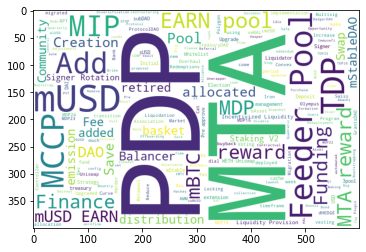

In [37]:
wordcloud1
plt.imshow(wordcloud1)

In [38]:
wordcloud1 = WordCloud(background_color='white',
                        width=600,
                        height=400)

wordcloud1.generate(" ".join(body))

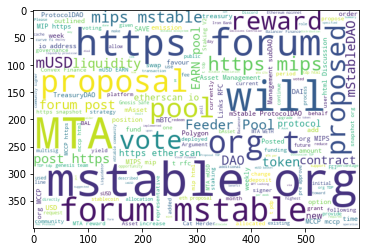

In [39]:
wordcloud1
plt.imshow(wordcloud1)

### Edit stopwords

In [40]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Update the stopword list:
stop_words.update(["https"])

In [41]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'https',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 

In [42]:
list_words = ["https"]

In [43]:
def text_preprocessing_updated(text, list_words):
    """
    Cleaning and parsing the text.
    """
    nopunc = clean_text(text)
    
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

    nopunc = tokenizer.tokenize(nopunc)

    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(list_words)
    
    
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [44]:
#df1['body'] = df1['body'].apply(lambda x : text_preprocessing_updated(x, list_words))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloudt = WordCloud(background_color='white',
                        width=600,
                        height=400).generate(" ".join(title))

ax1.imshow(wordcloudt)
ax1.axis('off')
ax1.set_title('title',fontsize=40)

wordcloudb = WordCloud(background_color='white',
                        width=600,
                        height=400).generate(" ".join(body))
ax2.imshow(wordcloudb)
ax2.axis('off')
ax2.set_title('body',fontsize=40);

# Topic modelling

In [46]:
import gensim
from gensim import corpora

In [56]:
dictionary = corpora.Dictionary(df1['clean_body'])
dictionary.save('dictionary.dict')
dictionary

In [57]:
dictionary.token2id

{'allow': 0,
 'allows': 1,
 'amount': 2,
 'basset': 3,
 'buyback': 4,
 'change': 5,
 'contract': 6,
 'current': 7,
 'directly': 8,
 'discussion': 9,
 'distribute': 10,
 'distributing': 11,
 'distribution': 12,
 'eg': 13,
 'fee': 14,
 'fees': 15,
 'flow': 16,
 'forked': 17,
 'form': 18,
 'governance': 19,
 'instead': 20,
 'links': 21,
 'lower': 22,
 'masset': 23,
 'massets': 24,
 'mbtcthe': 25,
 'mccp': 26,
 'min': 27,
 'model': 28,
 'mstable': 29,
 'mtaadditionally': 30,
 'musd': 31,
 'native': 32,
 'new': 33,
 'overhaul': 34,
 'overhauled': 35,
 'parameter': 36,
 'portion': 37,
 'proposal': 38,
 'proposed': 39,
 'protocol': 40,
 'rather': 41,
 'redeem': 42,
 'redirecting': 43,
 'rest': 44,
 'revenue': 45,
 'revenuebuyback': 46,
 'revenuesplitbuyback': 47,
 'reward': 48,
 'rewards': 49,
 'rfc': 50,
 'saving': 51,
 'sends': 52,
 'slippage': 53,
 'stakers': 54,
 'storage': 55,
 'strategy': 56,
 'swap': 57,
 'swaps': 58,
 'token': 59,
 'tokens': 60,
 'treasury': 61,
 'treasurydao': 62,
 '

Create corpus method

In [58]:
for item in df1['clean_body']:
    print(dictionary.doc2bow(item))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 3), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 3), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)]
[(9, 1), (21, 1), (32, 2), (38, 1), (39, 2), (49, 2), (50, 1), (60, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 4), (72, 1), (73, 1), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 5), (97, 2), (98, 1), (99, 1), (100, 2), (101, 1), (102, 2), (103, 1

In [59]:
#covert into matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df1['clean_body']]

In [60]:
for word_id, count in doc_term_matrix[11]:
    print(word_id,dictionary[word_id])
    print('--------')

0 allow
--------
9 discussion
--------
19 governance
--------
21 links
--------
26 mccp
--------
33 new
--------
38 proposal
--------
39 proposed
--------
50 rfc
--------
86 mta
--------
101 still
--------
109 would
--------
129 multisig
--------
153 contracts
--------
159 following
--------
166 protocoldao
--------
243 multisigs
--------
298 process
--------
302 smart
--------
339 allowed
--------
340 collect
--------
341 collected
--------
342 communicated
--------
343 created
--------
344 described
--------
345 forum
--------
346 interact
--------
347 less
--------
348 mbpt
--------
349 one
--------
350 overheadproper
--------
351 placea
--------
352 preserved
--------
353 procedure
--------
354 request
--------
355 requests
--------
356 required
--------
357 since
--------
358 stake
--------
359 step
--------
360 streamlined
--------
361 thread
--------
362 transactions
--------
363 transparency
--------
364 updated
--------
365 upon
--------
366 whitelist
--------


In [61]:
corpora.MmCorpus.serialize('corpus_s.mm', doc_term_matrix)

print(len(doc_term_matrix))
df1.shape

112


(112, 13)

In [62]:
Lda = gensim.models.ldamodel.LdaModel

In [63]:
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, 
               passes=50)

In [64]:
ldamodel.save('proposal_topics.model')

In [65]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel =  Lda.load('proposal_topics.model')

In [66]:
ldamodel.print_topics()

[(0,
  '0.017*"save" + 0.009*"mstable" + 0.009*"treasurydao" + 0.008*"signer" + 0.007*"proposed" + 0.006*"lending" + 0.006*"proposal" + 0.006*"option" + 0.005*"protocoldao" + 0.005*"comp"'),
 (1,
  '0.022*"musd" + 0.015*"pool" + 0.013*"proposal" + 0.012*"mstable" + 0.012*"proposed" + 0.010*"feeder" + 0.007*"mta" + 0.007*"rewards" + 0.007*"would" + 0.006*"posted"'),
 (2,
  '0.018*"liquidity" + 0.015*"subdao" + 0.015*"asset" + 0.014*"finance" + 0.014*"management" + 0.012*"proposal" + 0.011*"position" + 0.009*"mta" + 0.008*"proposed" + 0.008*"convex"'),
 (3,
  '0.023*"mstable" + 0.023*"mta" + 0.009*"funding" + 0.009*"dao" + 0.008*"proposal" + 0.008*"mstabledao" + 0.007*"community" + 0.007*"per" + 0.006*"rewards" + 0.006*"usd"'),
 (4,
  '0.033*"mta" + 0.017*"earn" + 0.016*"pool" + 0.015*"mstable" + 0.013*"rewards" + 0.012*"proposal" + 0.010*"proposed" + 0.009*"community" + 0.008*"musd" + 0.007*"uniswap"')]

In [67]:
topics = ldamodel.print_topics(num_words=5, num_topics=20)

In [68]:
for i in topics:
    print('Topic number {} \n'.format(i[0]))
    for j in i: 
        print (j)
        print('......................')

Topic number 0 

0
......................
0.017*"save" + 0.009*"mstable" + 0.009*"treasurydao" + 0.008*"signer" + 0.007*"proposed"
......................
Topic number 1 

1
......................
0.022*"musd" + 0.015*"pool" + 0.013*"proposal" + 0.012*"mstable" + 0.012*"proposed"
......................
Topic number 2 

2
......................
0.018*"liquidity" + 0.015*"subdao" + 0.015*"asset" + 0.014*"finance" + 0.014*"management"
......................
Topic number 3 

3
......................
0.023*"mstable" + 0.023*"mta" + 0.009*"funding" + 0.009*"dao" + 0.008*"proposal"
......................
Topic number 4 

4
......................
0.033*"mta" + 0.017*"earn" + 0.016*"pool" + 0.015*"mstable" + 0.013*"rewards"
......................


In [69]:
ldamodel.show_topic(0,10)

[('save', 0.01655432),
 ('mstable', 0.009219174),
 ('treasurydao', 0.008937707),
 ('signer', 0.008351775),
 ('proposed', 0.007284033),
 ('lending', 0.0062100897),
 ('proposal', 0.005788291),
 ('option', 0.005689342),
 ('protocoldao', 0.0052109463),
 ('comp', 0.005050465)]

In [70]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
first_topic_words

{'save': 0.01655432,
 'mstable': 0.009219174,
 'treasurydao': 0.008937707,
 'signer': 0.008351775,
 'proposed': 0.007284033,
 'lending': 0.0062100897,
 'proposal': 0.005788291,
 'option': 0.005689342,
 'protocoldao': 0.0052109463,
 'comp': 0.005050465,
 'vote': 0.0047491645,
 'apy': 0.004695422,
 'would': 0.0046947165,
 'community': 0.0043211603,
 'outlined': 0.004099241,
 'yield': 0.003938054,
 'masset': 0.0039374684,
 'make': 0.003937309,
 'tokens': 0.0039372323,
 'composable': 0.0039363275,
 'loan': 0.003935652,
 'deposit': 0.0038857043,
 'even': 0.0036734082,
 'new': 0.0036343576,
 'pools': 0.0035988481,
 'liquidated': 0.003546865,
 'musd': 0.0035207388,
 'upon': 0.0034488128,
 'discussion': 0.003420712,
 'current': 0.003387061,
 'executed': 0.0033559706,
 'pool': 0.0032617827,
 'functionality': 0.0031806135,
 'massets': 0.0031805586,
 'weekly': 0.0031802997,
 'collected': 0.0031802456,
 'usd': 0.0031801597,
 'lead': 0.0031800831,
 'also': 0.003179968,
 'system': 0.0031799625,
 'ma

## Model visualization

In [71]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py

In [72]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.117547  0.109999       1        1  27.198556
4     -0.088527  0.050822       2        1  24.785457
1     -0.090251 -0.012198       3        1  20.824583
2      0.075070 -0.130343       4        1  17.565643
0     -0.013840 -0.018280       5        1   9.625760, topic_info=            Term       Freq      Total Category  logprob  loglift
1571        earn  41.000000  41.000000  Default  30.0000  30.0000
170         save  36.000000  36.000000  Default  29.0000  29.0000
185      finance  31.000000  31.000000  Default  28.0000  28.0000
127   management  28.000000  28.000000  Default  27.0000  27.0000
140       subdao  44.000000  44.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
33           new   3.229673  34.911479   Topic5  -5.6173  -0.0397
92         pools   3.198117  34.724178   Topic5  -5.6271  -0.0441
7        current   3.009912  25.675327   Topic5  -5.6878   0.1971
31          musd   3.128705  72.929921   Topic5  -5.6491  -0.8082
9     discussion   3.039816  35.710555   Topic5  -5.6779  -0.1229

[356 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
400       2  0.803975  abachi
173       1  0.139818     add
173       3  0.769000     add
173       5  0.139818     add
174       2  0.193786   added
...     ...       ...     ...
1824      5  0.087511     yes
198       2  0.260189   yield
198       3  0.346918   yield
198       4  0.086730   yield
198       5  0.260189   yield

[601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

Wordclouds visualizations

In [73]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
fourth_topic_words = dict(ldamodel.show_topic(3,1000))
five_topic_words = dict(ldamodel.show_topic(4,1000))

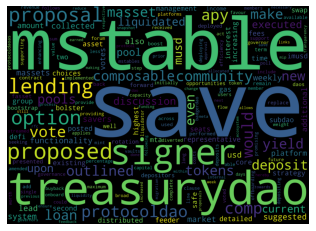

In [74]:
firstcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        width=2500,
                        height=1800
                         ).generate_from_frequencies(first_topic_words)
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

In [75]:
del first_topic_words['mstable']

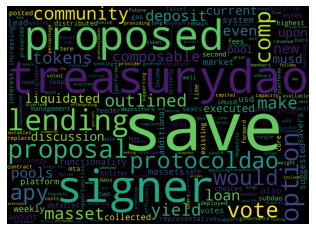

In [76]:
firstcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        width=2500,
                        height=1800
                         ).generate_from_frequencies(first_topic_words)
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

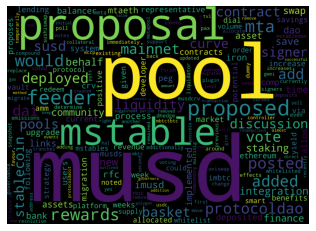

In [77]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(second_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [78]:
del second_topic_words ['proposed']

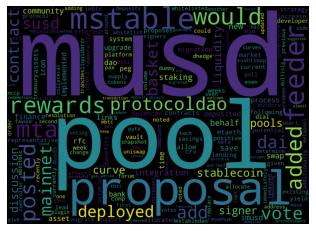

In [79]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(second_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

Apparently, signer is a role that is being discussed 

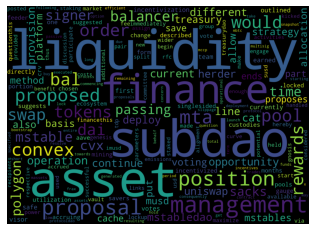

In [80]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(third_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

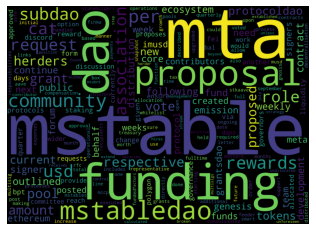

In [81]:
#this one is a very financy one

cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(fourth_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

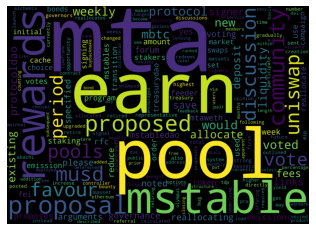

In [82]:
# Cat Herders for the ProtocolDAO
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(five_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Model evaluation

In [93]:
import importlib

In [94]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  


Perplexity:  -7.155932140309021
